In [1]:
import pandas as pd
import numpy as np

In [2]:
data_file = 'data/hon_eats_data.json'

# Load Data

In [3]:
df = pd.read_json(data_file)
df.shape

(15903, 20)

In [4]:
df.head()

,restaurant_name,description,url,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,review_data
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",https://www.tripadvisor.com/Restaurant_Review-...,,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,,,FEATURES,Reservations,4.0,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$ | Vietnamese,None,,,CUISINES | Meals,"Vietnamese | Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,,,Meals,"Breakfast, Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",https://www.tripadvisor.com/Restaurant_Review-...,,None,,,,,5.0,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15903 entries, 0 to 15902
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_name    15903 non-null  object 
 1   description        15903 non-null  object 
 2   url                15903 non-null  object 
 3   top_details        15903 non-null  object 
 4   about              4299 non-null   object 
 5   tag_cats           15903 non-null  object 
 6   tags               15903 non-null  object 
 7   more_details_cats  15903 non-null  object 
 8   more_details       15903 non-null  object 
 9   overall_rating     15653 non-null  float64
 10  food_rating        14855 non-null  float64
 11  service_rating     14860 non-null  float64
 12  value_rating       14862 non-null  float64
 13  atmosphere_rating  12972 non-null  float64
 14  num_reviews        15653 non-null  float64
 15  ranking            15500 non-null  object 
 16  address            159

# Unnest Review Data

## Get Rows with Nonzero Reviews

In [6]:
df_nonzero_reviews = df[(df['review_data'].apply(lambda x: len(x))>=1) 
                        & (~df['num_reviews'].isnull())].copy()
df_nonzero_reviews.head()

,restaurant_name,description,url,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,review_data
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",https://www.tripadvisor.com/Restaurant_Review-...,,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,,,FEATURES,Reservations,4.0,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$ | Vietnamese,None,,,CUISINES | Meals,"Vietnamese | Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,,,Meals,"Breakfast, Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",https://www.tripadvisor.com/Restaurant_Review-...,,None,,,,,5.0,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [7]:
# Get subset of columns
df_reviews = df_nonzero_reviews[['url', 'review_data']]
df_reviews.head()

,url,review_data
0,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [8]:
# Unnest
df_reviews_unnested = pd.concat(df_reviews['review_data'].apply(pd.DataFrame).tolist(),
          keys=df_reviews["url"]).reset_index(level="url")
df_reviews_unnested.shape

(147951, 4)

In [9]:
# Drop duplicate rows
df_reviews_unnested.drop_duplicates(inplace=True)
df_reviews_unnested.shape

(147938, 4)

In [10]:
# Include more columns for merging later
df_reviews_full = pd.merge(df_nonzero_reviews[['restaurant_name', 'description', 
                                               'address', 'url']], df_reviews_unnested, on='url')
print(df_reviews_full.shape)
df_reviews_full.head()

(147938, 7)


,restaurant_name,description,address,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


# Clean Up Restaurant Data

In [11]:
df_restaurants = df_nonzero_reviews.drop(columns=['url', 'review_data'])
df_restaurants.shape

(15653, 18)

In [12]:
# Drop duplicate rows
df_restaurants.drop_duplicates(inplace=True)
df_restaurants.shape

(1557, 18)

In [13]:
df_restaurants.head()

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,,,FEATURES,Reservations,4.0,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",$$ - $$$ | Vietnamese,None,,,CUISINES | Meals,"Vietnamese | Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",$$ - $$$,None,,,Meals,"Breakfast, Lunch, Dinner",4.5,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",,None,,,,,5.0,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...


## Check Unique Values

In [14]:
df_restaurants.nunique()

restaurant_name      1382
description          1556
top_details           465
about                  77
tag_cats                6
tags                  143
more_details_cats      20
more_details          796
overall_rating          9
food_rating             6
service_rating          6
value_rating            6
atmosphere_rating       7
num_reviews           305
ranking              1497
address              1365
location              111
image_url            1256
dtype: int64

## Check Null Values

In [15]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1478
tag_cats                0
tags                    0
more_details_cats       0
more_details            0
overall_rating          0
food_rating           765
service_rating        759
value_rating          761
atmosphere_rating    1154
num_reviews             0
ranking                 3
address                 0
location              110
image_url               0
dtype: int64

#### Handling Null Values
* about - Disregard column
* rating columns (4) - *Impute later*
* ranking - **Investigate**
* location - **Fill with string "N/A"**

### Drop Null Rankings

In [16]:
df_restaurants[df_restaurants['ranking'].isna()==True]

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url
149,"Real a Gastropub, Honolulu","Real a Gastropub, Honolulu: See 100 unbiased r...",$$ - $$$ | American | Bar | International,None,,,CUISINES | Meals,"American, Bar, Pub, International | Lunch, Din...",4.5,4.5,4.5,4.0,4.5,100.0,None,"1020 Auahi St, Honolulu, Oahu, HI 96814-4134",1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
7431,"Top of Waikiki, Honolulu","Reserve a table at Top of Waikiki, Honolulu on...",$$$$ | American | Fusion | Vegetarian Friendly,Top of Waikiki offers one of the most amazing ...,PRICE RANGE | Special Diets | Meals | CUISINES...,"$25 - $40 | Vegetarian Friendly, Vegan Options...",,,4.0,4.0,4.0,3.5,4.0,1598.0,None,"2270 Kalakaua Ave Ste 1800, Honolulu, Oahu, HI...",0.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...
9808,Viaggio Honolulu Italian Restaurant,"Viaggio Honolulu Italian Restaurant, Honolulu:...",$$ - $$$ | Italian | Bar | Seafood,None,,,PRICE RANGE | CUISINES | Meals,"$14 - $58 | Italian, Bar, Seafood, European, P...",3.5,NaN,NaN,NaN,NaN,14.0,None,"888 Kapiolani Blvd, Honolulu, HI 96813 Corner ...",1.0 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...


In [17]:
# Drop all 3 restaurants above, confirmed they are CLOSED on Tripadvisor
df_restaurants.drop(index=df_restaurants[df_restaurants['ranking'].isna()==True].index, 
                    inplace=True)
df_restaurants.shape

(1554, 18)

### Fill Null Locations

In [18]:
df_restaurants['location'].fillna("N/A", inplace=True)

In [19]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1476
tag_cats                0
tags                    0
more_details_cats       0
more_details            0
overall_rating          0
food_rating           764
service_rating        758
value_rating          760
atmosphere_rating    1153
num_reviews             0
ranking                 0
address                 0
location                0
image_url               0
dtype: int64

## Geocode Addresses

In [52]:
df_address = df_restaurants[['restaurant_name', 'description', 'address']]

In [55]:
df_address.head()

,restaurant_name,description,address
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117"
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...","1115 Bethel St, Honolulu, Oahu, HI 96813-2202"
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...","2227 S Beretania St, Honolulu, Oahu, HI 96826-..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...","949 Auahi St, Honolulu, Oahu, HI 96814"
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho..."


## Clean Restaraunt Details

# TODO
* Update save_dataframe.py to save either tag_cats/tags or more_details_cats/more_details (NOT BOTH) as dicts

In [67]:
df_restaurant_details.shape

(1554, 6)

In [73]:
df_restaurant_details = df_restaurants[['restaurant_name', 'top_details', 'tag_cats', 'tags', 'more_details_cats', 'more_details']].copy()
df_restaurant_details.sample(5)

,restaurant_name,top_details,tag_cats,tags,more_details_cats,more_details
10019,"Plantation Cafe, Honolulu",$$ - $$$ | American | Vegetarian Friendly,,,CUISINES | Special Diets | Meals,"American | Vegetarian Friendly | Breakfast, Di..."
7428,"Pizza Hut, Honolulu",Pizza,,,CUISINES,Pizza
12430,"McDonald's, Honolulu",$,,,Meals | FEATURES,"Breakfast, Lunch, Dinner | Drive Thru"
7306,"It's Good & Healthy Cafe, Honolulu",$ | Lebanese | Mediterranean,,,CUISINES | Meals,"Mediterranean, Lebanese | Breakfast, Lunch"
5637,"Jamba Juice, Honolulu",,,,Meals,"Breakfast, Lunch, Dinner"


In [86]:
df_restaurant_details['tag_cats_split'] = df_restaurant_details['tag_cats'].str.split('|')
df_restaurant_details['tags_split'] = df_restaurant_details['tags'].str.split('|')
df_restaurant_details['more_details_cats_split'] = df_restaurant_details['more_details_cats'].str.split('|')
df_restaurant_details['more_details_split'] = df_restaurant_details['more_details'].str.split('|')

In [87]:
df_restaurant_details.sample(5)

,restaurant_name,top_details,tag_cats,tags,more_details_cats,more_details,tag_cats_split,tags_split,more_details_cats_split,more_details_split
13846,"Tea at 1024, Honolulu",$$ - $$$ | British,,,PRICE RANGE | CUISINES | Meals,"$10 - $19 | British | Breakfast, Lunch, Dinner",[],[],"[PRICE RANGE , CUISINES , Meals]","[$10 - $19 , British , Breakfast, Lunch, Din..."
13849,"Taco Bell, Honolulu",$ | Mexican,,,CUISINES | Meals,"Mexican | Breakfast, Lunch, Dinner",[],[],"[CUISINES , Meals]","[Mexican , Breakfast, Lunch, Dinner]"
3829,"Back Alley, Honolulu",,,,Meals,Dinner,[],[],[Meals],[Dinner]
15423,"Tiki's Grill & Bar, Honolulu",$$ - $$$ | American | Bar | Seafood,PRICE RANGE | Special Diets | Meals | CUISINES...,"$20 - $40 | Vegetarian Friendly, Vegan Options...",,,"[PRICE RANGE , Special Diets , Meals , CUIS...","[$20 - $40 , Vegetarian Friendly, Vegan Optio...",[],[]
14682,"Hide-Chan Restaurant, Honolulu",$$ - $$$ | Japanese | Asian,,,PRICE RANGE | CUISINES | Meals,"$20 - $30 | Japanese, Asian | Lunch, Dinner",[],[],"[PRICE RANGE , CUISINES , Meals]","[$20 - $30 , Japanese, Asian , Lunch, Dinner]"


In [102]:
df_restaurant_details['more_details_cats_split']

0                                [Meals]
1                             [FEATURES]
2                    [CUISINES ,  Meals]
3                                [Meals]
4                                     []
                      ...               
15868                                 []
15898    [CUISINES ,  Meals ,  FEATURES]
15900                [CUISINES ,  Meals]
15901                [CUISINES ,  Meals]
15902                            [Meals]
Name: more_details_cats_split, Length: 1554, dtype: object

In [112]:
df_restaurant_details['tag_cats_split'][15868]

['PRICE RANGE ', ' Special Diets ', ' Meals ', ' CUISINES ', ' FEATURES']

# Merge Cleaned Restaurant & Review Data

In [20]:
df_full = pd.merge(df_restaurants, df_reviews_full, 
                   on=['restaurant_name', 'description', 'address'])
df_full.shape

(147742, 22)

In [21]:
df_full.head()

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


In [22]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147742 entries, 0 to 147741
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    147742 non-null  object 
 1   description        147742 non-null  object 
 2   top_details        147742 non-null  object 
 3   about              41227 non-null   object 
 4   tag_cats           147742 non-null  object 
 5   tags               147742 non-null  object 
 6   more_details_cats  147742 non-null  object 
 7   more_details       147742 non-null  object 
 8   overall_rating     147742 non-null  float64
 9   food_rating        144799 non-null  float64
 10  service_rating     144836 non-null  float64
 11  value_rating       144857 non-null  float64
 12  atmosphere_rating  127662 non-null  float64
 13  num_reviews        147742 non-null  float64
 14  ranking            147742 non-null  object 
 15  address            147742 non-null  object 
 16  lo

# EDA

In [23]:
df_full.sample(20)

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
12949,"CJ's New York Style Delicatessen, Honolulu","CJ's New York Style Delicatessen, Honolulu: Se...",$$ - $$$ | American | Vegetarian Friendly | Ve...,None,,,CUISINES | Special Diets | Meals,"American | Vegetarian Friendly, Vegan Options,...",4.0,4.0,...,3.5,912.0,"#153 of 1,581 Restaurants in Honolulu",2005 Kalia Rd Hilton Hawaiian Village Waikiki ...,1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,anthonyp994,3.0,Maybe we picked a bad day because other people...
18280,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.5,4.5,...,4.5,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Bradpitt2016,4.0,While in Waikiki you must try Dukes at least o...
64446,"Marukame Udon Waikiki, Honolulu","Order food online at Marukame Udon Waikiki, Ho...",$ | Japanese | Asian | Soups,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options | Lunch, Di...",,,4.5,4.5,...,4.0,3743.0,"#16 of 1,581 Restaurants in Honolulu","2310 Kuhio Ave, Honolulu, Oahu, HI 96815-2983",0.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Alaina-Sapphire B,4.0,"This restaurant always has a long line, with g..."
120892,"Alan Wong's Restaurant, Honolulu","Reserve a table at Alan Wong's Restaurant, Hon...",$$$$ | Seafood | Fusion | Hawaiian,None,,,,,4.5,4.5,...,4.0,1680.0,"#35 of 1,581 Restaurants in Honolulu","1857 S King St Fl 3RD, Honolulu, Oahu, HI 9682...",N/A,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,ronj476,5.0,"Not my first visit, not my last.\nAs always st..."
95401,"Harbor Restaurant At Pier 38, Honolulu","Harbor Restaurant At Pier 38, Honolulu: See 96...",$$ - $$$ | Italian | Mexican | Vegetarian Frie...,None,,,CUISINES | Special Diets,"Italian, Mexican | Vegetarian Friendly, Vegan ...",4.0,4.5,...,NaN,96.0,"#234 of 1,581 Restaurants in Honolulu",1129 N Nimitz Hwy Upstairs Pier 38 Fishing Vil...,1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Marc_and_Kim_Z,5.0,Did a work going away. Great service and del...
95259,"Pho One, Honolulu","Pho One, Honolulu: See 97 unbiased reviews of ...",$$ - $$$ | Asian | Vietnamese | Vegetarian Fri...,None,,,PRICE RANGE | CUISINES | Special Diets,"$10 - $20 | Asian, Vietnamese | Vegan Options,...",4.0,4.5,...,3.5,97.0,"#220 of 1,581 Restaurants in Honolulu","1617 Kapiolani Blvd Ste 101, Honolulu, Oahu, H...",0.6 miles from Ala Moana Beach Park,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,CheerioandMatilda,5.0,If you’re looking for a Vietnamese restaurant ...
2308,"Giovanni Pastrami, Honolulu","Order food online at Giovanni Pastrami, Honolu...",$$ - $$$ | Italian | Deli | Vegetarian Friendly,None,PRICE RANGE | Special Diets | Meals | CUISINES...,"$10 - $20 | Vegetarian Friendly, Gluten Free O...",,,4.0,4.0,...,3.5,1466.0,"#162 of 1,581 Restaurants in Honolulu","227 Lewers St Ste 118, Honolulu, Oahu, HI 9681...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Charlene P,5.0,We wanted an afternoon snack so we stopped in ...
115089,"P.F. Chang's, Honolulu","Order food online at P.F. Chang's, Honolul

# Part I: Popularity Recommender

# Part II: Content-Based Recommender

# Part III: Collaborative Filtering Recommender

## Drop Rows with Null Usernames

In [24]:
df_nonnull_users = df_full.drop(index=df_full[df_full['user_name'].isnull()].index).copy()

In [25]:
df_nonnull_users.head()

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


## Drop Rows with Usernames Containing Space (Real Names)

In [26]:
df_nonnull_users['invalid_username'] = 0

In [27]:
df_nonnull_users.loc[df_nonnull_users[df_nonnull_users['user_name'].str.contains(' ')].index, 'invalid_username'] = 1

In [28]:
df_nonnull_users.sample(10)

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,...,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents,invalid_username
24431,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.5,4.5,...,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,gagnsekhon,5.0,This place was a great start to our morning! B...,0
13309,"Flour & Barley Brick Oven Pizza, Honolulu",Order food online at Flour & Barley Brick Oven...,$$ - $$$ | Italian | American | Bar,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.0,4.0,...,520.0,"#101 of 1,581 Restaurants in Honolulu","2330 Kalakaua Ave International Market Place, ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,JoyR1198,4.0,Returned for a second time. First time was hap...,0
13622,"Flour & Barley Brick Oven Pizza, Honolulu",Order food online at Flour & Barley Brick Oven...,$$ - $$$ | Italian | American | Bar,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.0,4.0,...,520.0,"#101 of 1,581 Restaurants in Honolulu","2330 Kalakaua Ave International Market Place, ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Mister_Simple_Truth,4.0,Had an afternoon happy hour at this place. Nic...,0
117624,"Tommy Bahama Restaurant, Bar & Store, Honolulu","Reserve a table at Tommy Bahama Restaurant, Ba...",$$ - $$$ | American | Bar | Seafood,Tommy Bahama Restaurant & Bar is located in th...,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.5,4.5,...,1381.0,"#10 of 1,581 Restaurants in Honolulu","298 Beach Walk, Honolulu, Oahu, HI 96815-1970",0.8 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Pat M,5.0,We looked at the tripadvisor reviews and decid...,1
22622,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,Special Diets | Meals | CUISINES | FEATURES,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,,4.5,4.5,...,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Julie W,5.0,By far the best fish tacos in Waikiki! Their M...,1
59473,"Cheeseburger In Paradise, Honolulu","Cheeseburger In Paradise, Honolulu: See 3,531 ...",$$ - $$$ | American | Bar | Vegetarian Friendly,None,PRICE RANGE | Special Diets | Meals | CUISINES...,"$10 - $15 | Vegetarian Friendly, Vegan Options...",,,4.0,4.0,...,3531.0,"#105 of 1,581 Restaurants in Honolulu","2500 Kalakaua Ave Ste A, Honolulu, Oahu, HI 96...",0.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Rod T,3.0,we took our 4 kids there for supper. It was no...,1
88970,"LuLu's Waikiki, Honolulu","Order food online at LuLu's Waikiki, Honolulu ...",$$ - $$$ | American | Bar | Hawaiian,None,,,CUISINES | Special Diets | Meals,"American, Bar, Hawaiian | Vegetarian Friendly,...",4.0,4.0,...,3020.0,"#137 of 1,581 Restaurants in Honolulu",2586 Kalakaua Ave Corner of Kalakaua and Kapah...,0.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,420krayz

In [29]:
df_valid_users = df_nonnull_users[df_nonnull_users['invalid_username']==0].copy()
df_valid_users.shape

(114320, 23)

In [30]:
df_valid_users.head()

,restaurant_name,description,top_details,about,tag_cats,tags,more_details_cats,more_details,overall_rating,food_rating,...,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents,invalid_username
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...,0
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...,0
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,Meals,"Breakfast, Lunch, Dinner",5.0,NaN,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...,0
5,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,,,FEATURES,Reservations,4.0,NaN,...,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,28franniel,4.0,Our son took us to this new and hip spot to th...,0
6,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,,,FEATURES,Reservations,4.0,NaN,...,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,LW811055,4.0,We had side salads and ravioli and florentine ...,0


## Get Subset of Data with Restaurant, User, Rating

In [31]:
df_valid_users_subset = df_valid_users[['restaurant_name', 'user_name', 'bubble_rating']]
df_valid_users_subset.shape

(114320, 3)

In [32]:
df_valid_users_subset.head()

,restaurant_name,user_name,bubble_rating
0,Hanks Cafe Honolulu,waynen95,4.0
2,Hanks Cafe Honolulu,RowerChicago,5.0
4,Hanks Cafe Honolulu,cg148777,5.0
5,"Bethel Union, Honolulu",28franniel,4.0
6,"Bethel Union, Honolulu",LW811055,4.0


In [33]:
n = 5
df_valid_users_subset_grouped = df_valid_users_subset.groupby('user_name').count()['bubble_rating'].reset_index()
df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]

,user_name,bubble_rating
1,-Pikake-too,6
8,007sg,5
16,02b84b52,6
26,05Olga05,6
52,100PENANG,9
...,...,...
55079,zdaati,5
55092,zekimus,16
55122,zillabong,5
55133,zkeeper,11


In [34]:
n = 5
users_min_n_ratings = df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]['user_name'].to_list()
len(users_min_n_ratings)

3998

## Utility Matrix

In [35]:
df_valid_users_subset_min_n_ratings = df_valid_users_subset.loc[df_valid_users_subset['user_name'].isin(users_min_n_ratings)]

In [36]:
utility_df = df_valid_users_subset_min_n_ratings.pivot_table(values='bubble_rating',index='user_name',columns='restaurant_name')
utility_df.shape

(3998, 1160)

In [37]:
utility_df.head()

restaurant_name,"100 Sails Restaurant & Bar, Honolulu","1132 Cafe & Catering, Honolulu","12th Avenue Grill, Honolulu","3 Star Gourmet Restaurant, Honolulu","3660 on the Rise, Honolulu","53 By The Sea, Honolulu","8 Fat Fat 8, Honolulu","8 Half Desserts, Honolulu","99 Local Mix Plate, Honolulu","9bar Hnl, Honolulu",...,"Zippy's Restaurant - Mokauea St, Honolulu","Zippy's Restaurant, Honolulu","Zippy's, Honolulu","Zippys Restaurant 1222 S King St, Honolulu","Zippys Restaurant Dillingham Blvd, Honolulu","Zippy’s Koko Marina, Honolulu","bills Hawaii, Honolulu","d.k Steak House, Honolulu","goofy cafe & dine, Honolulu","kim chee 2, Honolulu"
user_name,,,,,,,,,,,,,,,,,,,,,
-Pikake-too,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
007sg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02b84b52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Olga05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100PENANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings (per user): 1


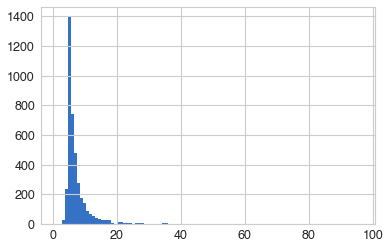

In [38]:
ratings = (utility_df > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings (per user): {}'.format(ratings.min()))

Min number of ratings (per restaurant): 1


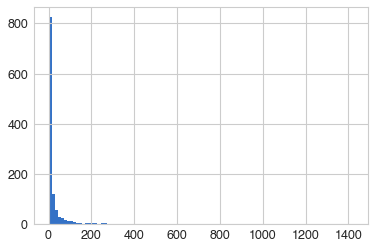

In [39]:
ratings = (utility_df > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings (per restaurant): {}'.format(ratings.min()))

In [40]:
number_ratings = (df_valid_users_subset['bubble_rating'] > 0).sum()
density = number_ratings / (utility_df.shape[0] * utility_df.shape[1])
print('The density is: {} '.format(density))

The density is: 0.02465025616256404 
